In [21]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib as mpl

In [2]:
df = pd.read_csv(filepath_or_buffer="data/pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
def createDummies(df,var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name,drop_first=True)
    df = df.drop(var_name, axis=1)
    df = pd.concat([df, dummy], axis=1)
    return df

In [22]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

> IQR

In [9]:
df_aux = df[["Type 1", "HP"]]
df_aux

,Type 1,HP
0,Grass,45
1,Grass,60
2,Grass,80
3,Grass,80
4,Fire,39
...,...,...
795,Rock,50
796,Rock,50
797,Psychic,80
798,Psychic,80


In [6]:
df_aux.isnull().sum()

0

In [ ]:
df_aux = createDummies(df_aux, "Type 1")

In [12]:
df_aux

,HP,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,60,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,39,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
796,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
797,80,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
798,80,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
count_outliers(df_aux, "HP")

23

In [16]:
get_iqr_text(df_aux, "HP")

'median=65.00, q1=50.00, q3=80.00, iqr=30.00, minimum=5.00, maximum=125.00'

C:\Users\SerBuitrago2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

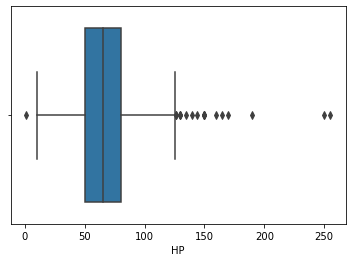

In [36]:
box_and_whisker(df_aux, "HP")

<AxesSubplot:>

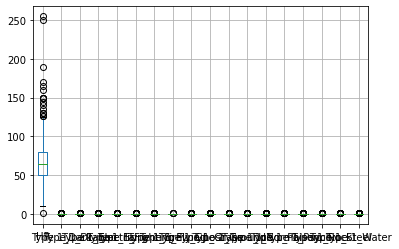

In [28]:
df_aux.boxplot()

In [41]:
df_aux_outlider_hp = remove_outliers(df_aux, "HP")
df_aux_outlider_hp

,HP,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,60,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,39,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
796,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
797,80,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
798,80,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


C:\Users\SerBuitrago2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

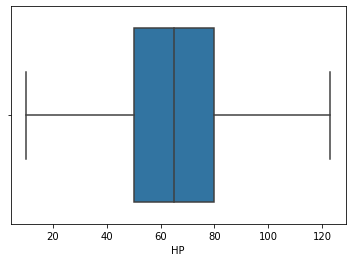

In [42]:
box_and_whisker(df_aux_outlider_hp, "HP")